# Phrase Modelling Part I - Building Corpora

## Set path

In [1]:
import os
path = os.getcwd()[:-16]
path

import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

import time

## Read and process document

Read data

In [2]:
import pandas as pd

news = pd.read_csv(path + '/emfdscore/emfd_processed.csv')

Process data

In [3]:
# 1. Z-transform mf-probability and mf-sentiment scores

def standardize(df):
    probabilities = ['care_p', 'fairness_p', 'loyalty_p', 'authority_p','sanctity_p']
    sentiments = ['care_sent', 'fairness_sent', 'loyalty_sent','authority_sent','sanctity_sent']
    
    for p in probabilities:
        df[p] = (df[p] - df[p].mean()) / df[p].std()
    for s in sentiments:
        df[s] = (df[s] - df[s].mean()) / df[s].std()
        
    return df

In [4]:
# 2. Multiply transformed mf-probability * mf-sentiment

def multiply(df):
    foundations = ['care','fairness','loyalty','authority','sanctity']
    
    for f in foundations:
        df[f+'_prod'] = df[f+'_p'] * df[f+'_sent']
    
    return df

In [5]:
# nested functions, putting it all together
processed_news = multiply(standardize(news))

In [20]:
print(processed_news.shape)
processed_news.head(5)

(699176, 21)


,datetime2,url,source_x,title,care_p,fairness_p,loyalty_p,authority_p,sanctity_p,care_sent,...,loyalty_sent,authority_sent,sanctity_sent,total_words,datetime2.1,care_prod,fairness_prod,loyalty_prod,authority_prod,sanctity_prod
0,2019-10-31 19:00:00-04:00,https://www.usatoday.com/story/sports/nfl/reds...,usatoday.com,"Trent Williams, Redskins OT, says he had cance...",-0.748319,-0.239336,-0.143331,-0.809146,-0.093073,0.623104,...,0.948519,0.384658,0.857586,665.0,2.019110e+13,-0.466280,-0.091422,-0.135952,-0.311245,-0.079818
1,2019-10-31 19:00:00-04:00,https://www.barrons.com/articles/pinterest-sto...,barrons.com,Pinterest Stock Plunges on Sales Miss,-0.406304,-0.389748,-1.641356,-2.383138,0.327396,-0.572139,...,1.243885,1.200078,-0.108423,229.0,2.019110e+13,0.232462,-0.278476,-2.041658,-2.859952,-0.035497
2,2019-10-31 19:00:00-04:00,https://www.washingtonpost.com/opinions/global...,washingtonpost.com,Baghdadi's death could mean more American with...,0.190461,-0.532758,0.597286,0.067132,0.102196,-0.366881,...,-0.299219,-0.424403,0.196929,730.0,2.019110e+13,-0.069877,0.108114,-0.178720,-0.028491,0.020125
3,2019-10-31 19:00:00-04:00,https://www.barrons.com/articles/arista-networ...,barrons.com,Arista Networks Stock Plunges as Earnings Outl...,-1.167978,-0.491382,-0.616291,-1.297638,-0.495363,0.646557,...,0.868904,0.107727,1.179168,363.0,2.019110e+13,-0.755164,-0.212345,-0.535497,-0.139791,-0.584116
4,2019-10-31 19:00:00-04:00,https://www.usatoday.com/story/sports/nba/2019...,usatoday.com,"Joel Embiid, Karl-Anthony Towns suspended two ...",-0.059949,-0.572616,-1.672334,-0.729370,-0.273279,0.546196,...,-1.151896,-1.036594,-1.968677,352.0,2.019110e+13,-0.032744,0.550585,1.926355,0.756060,0.537998


In [7]:
all_processed_news_titles_list = processed_news.title.tolist()

Generate ramdom sample from 10% of the data

In [420]:
#n = int(0.1*len(processed_news))
#sample = processed_news.sample(n=n, random_state=0)

In [421]:
#len(sample10)

69917

In [441]:
#path = os.getcwd() + '/csv/'
#sample.to_csv(path + 'sample10.csv')

In [422]:
#sample_titles_list = sample.title.tolist()

In [423]:
#sample_titles_list[:10]

['A "Pro-Life Hero"? Trump Becomes First President To Speak At \'March For Life\'',
 "USS Theodore Roosevelt's entire crew has been tested for coronavirus; over 800 positive, officials say",
 'COVID-19 Deaths Explode In Russia, Mexico And Brazil As Global Cases Top 6.5 Million: Live Updates',
 'Beware—Android Phones Crippled By Dangerous New Image Shared On Social Media',
 "Israel Will Vote Sunday To Annex West Bank Lands Delineated In Trump's 'Peace Plan'",
 'Indonesia study warns Ramadan exodus would fuel coronavirus',
 'Trump signs spending bills, avoiding government shutdown',
 "Trump lawyers' weak start opens the door to devastating questions",
 'Ex-NASA administrator James Beggs dead at 94',
 "Bills' Josh Allen says 57 Buffalo police officers who resigned don't deserve to be part of emergency unit"]

Create dictionary of titles

## Build corpus from selected data

1. Preprocess words in sentences (remove punctuation & stopwords)
2. Build bigrams and trigrams
3. Create dictionary using bag-of-words approach (assign IDs to words)
4. Create corpus as set of dictionary-defined vectors, each representing a document within the dataset

In [8]:
from gensim import corpora, models, utils

### Simple preprocess into words

In [73]:
all_processed_news_titles_list[10:20]

["Ladenburg Thalmann Mulls Sale - Barron's",
 'Delicious festival food items you can get on a stick',
 'A Top United Auto Workers Officer Faces Embezzlement Charges',
 'Trump, Lifelong New Yorker, Declares Himself a Resident of Florida',
 "Three very different books explore California's destiny",
 'Halloween Horror Double Feature: We Are The Monsters',
 "Viral video shows horse running back to 'rescue' loved ones amid Easy Fire evacuation in California",
 "Five UCI fraternity brothers charged in CV High graduate's alcohol poisoning death",
 'Billionaire Branson Gets Billions In Bonds To Launch Vegas To California Train Service',
 'Former Sheriff and TV Show Host Charged With Sexual Assault and Making Death Threat']

In [71]:
test = all_processed_news_titles_list[:5]

import nltk
from nltk.tag import pos_tag
nltk.download('averaged_perceptron_tagger')
nltk.download('universal_tagset')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/pw/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package universal_tagset to
[nltk_data]     /home/pw/nltk_data...
[nltk_data]   Package universal_tagset is already up-to-date!


True

In [79]:
! pip install stanfordnlp
import stanfordnlp
stanfordnlp.download('en')
stf_nlp = stanfordnlp.Pipeline(processors='tokenize,mwt,pos')

Defaulting to user installation because normal site-packages is not writeable
Using the default treebank "en_ewt" for language "en".
Would you like to download the models for: en_ewt now? (Y/n)


 Y



Default download directory: /home/pw/stanfordnlp_resources
Hit enter to continue or type an alternate directory.



Download location: /home/pw/stanfordnlp_resources/en_ewt_models.zip


100%|██████████| 235M/235M [00:40<00:00, 5.83MB/s] 



Download complete.  Models saved to: /home/pw/stanfordnlp_resources/en_ewt_models.zip
Extracting models file for: en_ewt
Cleaning up...Done.
Use device: gpu
---
Loading: tokenize
With settings: 
{'model_path': '/home/pw/stanfordnlp_resources/en_ewt_models/en_ewt_tokenizer.pt', 'lang': 'en', 'shorthand': 'en_ewt', 'mode': 'predict'}
---
Loading: pos
With settings: 
{'model_path': '/home/pw/stanfordnlp_resources/en_ewt_models/en_ewt_tagger.pt', 'pretrain_path': '/home/pw/stanfordnlp_resources/en_ewt_models/en_ewt.pretrain.pt', 'lang': 'en', 'shorthand': 'en_ewt', 'mode': 'predict'}
Done loading processors!
---


In [100]:
tagged_titles = [stf_nlp(title) for title in all_processed_news_titles_list]

In [138]:
def filter_upos(titles):
    for title in titles:
        # visual of upos and xpos tags of each word  
        #print(*[f'word: {word.text+" "}\tupos: {word.upos}\txpos: {word.xpos}' for sent in title.sentences for word in sent.words], sep='\n')
        
        # create list with upos tag condition 
        yield [word.text if word.upos in ["ADV","ADJ","VERB"] else None for sent in title.sentences for word in sent.words]

In [130]:
titles_upos_filter = list(filter_upos(tagged_titles)) # list of lists

In [139]:
titles_upos_filter_none = [list(filter(None, title)) for title in titles_upos_filter] # remove None values

In [140]:
def sent_to_words(titles):
    for title in titles:
        yield(utils.simple_preprocess(str(title), deacc=True))  # deacc=True removes punctuations

words = list(sent_to_words(titles_upos_filter_none)) # format: list of list

In [143]:
words[:5]

[['says', 'had', 'misdiagnosed'],
 ['plunges'],
 ['mean', 'more', 'american', 'bad'],
 ['plunges', 'disappoints'],
 ['suspended']]

### Remove stopwords

In [144]:
from spacy.lang.en import English
from spacy.lang.en.stop_words import STOP_WORDS
import en_core_web_sm
nlp = en_core_web_sm.load()

def stop_remove(texts):
    ls=[]
    for nested_list in texts:
        filtered_words = []
        for word in nested_list:
            lexeme = nlp.vocab[str(word)]
            if lexeme.is_stop == False:
                filtered_words.append(word)
        ls.append(filtered_words)
    return ls

words_nostops = stop_remove(words) # format: list of list

In [145]:
words_nostops[:5]

[['says', 'misdiagnosed'],
 ['plunges'],
 ['mean', 'american', 'bad'],
 ['plunges', 'disappoints'],
 ['suspended']]

### Remove words that appear only once

In [146]:
from collections import defaultdict

def filter_low_freq(texts):
    count1 = sum([len(ele) for ele in texts]) 

    # remove words that appear only once
    frequency = defaultdict(int)
    for text in texts:
        for token in text:
            frequency[token] += 1
    texts = [[token for token in text if frequency[token] > 1] for text in texts]

    count2 = sum([len(ele) for ele in texts]) 
    
    print('Before removal: %d' % count1)
    print('After removal: %d' % count2)
    
    return texts

words_filter = filter_low_freq(words_nostops)

Before removal: 1453200
After removal: 1447920


### Build bigram and trigram models

In [147]:
start = time.time()

bigram = models.Phrases(words_filter, min_count=5, threshold=100)
trigram = models.Phrases(bigram[words_filter], threshold=100)  

bigram_mod = models.phrases.Phraser(bigram)
trigram_mod = models.phrases.Phraser(trigram)

end = time.time()
print("Elapsed:", end - start, 'seconds')

Elapsed: 12.233544826507568 seconds


Define functions for trigrams and lemmatization

In [148]:
start = time.time()

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

words_trigrams = make_trigrams(words_filter)

end = time.time()
print("Elapsed:", end - start, 'seconds')

Elapsed: 6.11836838722229 seconds


In [149]:
start = time.time()
df = pd.DataFrame(words_trigrams)
end = time.time()
print("Elapsed:", end - start, 'seconds')

Elapsed: 23.012170791625977 seconds


In [150]:
df

,0,1,2,3,4,5,6,7,8,9,...,124,125,126,127,128,129,130,131,132,133
0,says,misdiagnosed,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
1,plunges,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
2,mean,american,bad,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
3,plunges,disappoints,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
4,suspended,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
699171,urge,halt,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
699172,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
699173,reportedly,says,considering,slave,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
699174,extends,plummet,public,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None


Save csv with trigrams (filtered by upos) to file

In [152]:
path = os.getcwd() + '/csv/'
df.to_csv(path + 'allnews_UPOSfilter.csv')

Create consolidated dataframe with the titles, emfdscores, and trigrams

In [151]:
allnews_addtrigrams = pd.concat([processed_news, df], axis=1)
print(allnews_addtrigrams.shape)
allnews_addtrigrams.head(5)

(699176, 155)


,datetime2,url,source_x,title,care_p,fairness_p,loyalty_p,authority_p,sanctity_p,care_sent,...,124,125,126,127,128,129,130,131,132,133
0,2019-10-31 19:00:00-04:00,https://www.usatoday.com/story/sports/nfl/reds...,usatoday.com,"Trent Williams, Redskins OT, says he had cance...",-0.748319,-0.239336,-0.143331,-0.809146,-0.093073,0.623104,...,None,None,None,None,None,None,None,None,None,None
1,2019-10-31 19:00:00-04:00,https://www.barrons.com/articles/pinterest-sto...,barrons.com,Pinterest Stock Plunges on Sales Miss,-0.406304,-0.389748,-1.641356,-2.383138,0.327396,-0.572139,...,None,None,None,None,None,None,None,None,None,None
2,2019-10-31 19:00:00-04:00,https://www.washingtonpost.com/opinions/global...,washingtonpost.com,Baghdadi's death could mean more American with...,0.190461,-0.532758,0.597286,0.067132,0.102196,-0.366881,...,None,None,None,None,None,None,None,None,None,None
3,2019-10-31 19:00:00-04:00,https://www.barrons.com/articles/arista-networ...,barrons.com,Arista Networks Stock Plunges as Earnings Outl...,-1.167978,-0.491382,-0.616291,-1.297638,-0.495363,0.646557,...,None,None,None,None,None,None,None,None,None,None
4,2019-10-31 19:00:00-04:00,https://www.usatoday.com/story/sports/nba/2019...,usatoday.com,"Joel Embiid, Karl-Anthony Towns suspended two ...",-0.059949,-0.572616,-1.672334,-0.729370,-0.273279,0.546196,...,None,None,None,None,None,None,None,None,None,None


Save consolidated csv (titles, emfdscores, trigrams) to file

In [153]:
path = os.getcwd() + '/csv/'
allnews_addtrigrams.to_csv(path + 'allnews_UPOSfilter_addtrigrams.csv')

In [462]:
#sample = sample.reset_index(drop=True)
#sample_addtrigrams = pd.concat([sample, df], axis=1)

#path = os.getcwd() + '/csv/'
#sample_addtrigrams.to_csv(path + 'sample10_addtrigrams.csv')

### Create dictionary & corpus from lemmatized trigrams

Create dictionary

In [154]:
id2word = corpora.Dictionary(words_trigrams)

Plot the frequency of number of document appearances

<module 'matplotlib.pyplot' from '/usr/local/miniconda3/envs/nlp/lib/python3.8/site-packages/matplotlib/pyplot.py'>

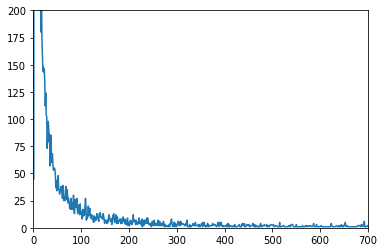

In [155]:
from collections import Counter

# get list of how many documents the word appeared in
doc_occurences = sorted(id2word.dfs.values()) 

# get frequency of each appearance count (e.g., there was 5000 words that appeared in a document once)
freq_doc_occur = Counter(doc_occurences).items() 

# x=number of document appearances, y=how many words have that number of document appearances
x, y = zip(*freq_doc_occur) 

import matplotlib.pyplot as plt

plt.plot(x,y,)
plt.ylim([0, 200])
plt.xlim([0, 700])
plt

View trigrams and their document occurrence rates

In [156]:
ls=[]
for key, value in id2word.dfs.items():
    if value < 100 :
        ls.append([key,id2word[key], value])

pd.DataFrame(ls, columns=['ID','trigrams','doc_occur']).sort_values(by='doc_occur', ascending=False).head(50)

,ID,trigrams,doc_occur
2099,4102,pure,99
466,1514,agreed,99
1977,3937,fixed,99
716,2056,homemade,99
1551,3376,barely,99
153,662,sensitive,99
2073,4067,overtakes,99
2285,4319,forecasts,99
1019,2609,writes,99
3823,6029,challenged,99


Filter trigrams from dictionary

In [158]:
path = os.getcwd() + '/tmp_sample/'

# Create Dictionary
id2word = corpora.Dictionary(words_trigrams)
print('Number of unique tokens in dictionary: %d' % len(id2word))

# Filter out words that occur in less than 100 documents
#id2word.filter_extremes(no_below=100)
print('Number of unique tokens after filtering: %d' % len(id2word))

# Filter out specific words
#id2word.filter_tokens(bad_ids= 
#                      (
#                          id2word.token2id['coronavirus'], 
#                          id2word.token2id['covid'],
#                          id2word.token2id['pandemic'],
                          #id2word.token2id['update'],
                          #id2word.token2id['cases'],
                          #id2word.token2id['virus'],
                          #id2word.token2id['china'],
                          #id2word.token2id['trump'],
                          #id2word.token2id['says'],
                          #id2word.token2id['new'],
#                      ))
#print('Number of unique tokens after filtering: %d' % len(id2word))

# Save to tmp folder
id2word.save(path + 'allnews_UPOSfilter_dict.dict') 

Number of unique tokens in dictionary: 17043
Number of unique tokens after filtering: 17043


Create corpus

In [159]:
start = time.time()
path = os.getcwd() + '/tmp_sample/'

# Create Corpus
texts = words_trigrams

# Bag-of-words representation of the documents.
corpus = [id2word.doc2bow(text) for text in texts]
corpora.MmCorpus.serialize(path + 'allnews_UPOSfilter_corpus.mm', corpus) # Save to tmp folder

end = time.time()
print("Elapsed:", end - start, 'seconds')

Elapsed: 3.9705405235290527 seconds


In [160]:
print('Number of unique tokens in dictionary: %d' % len(id2word))
print('Number of documents in corpus: %d' % len(corpus))

Number of unique tokens in dictionary: 17043
Number of documents in corpus: 699176
